In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


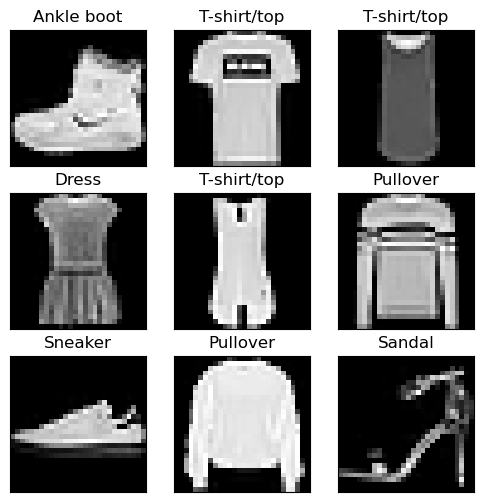

In [3]:
fig = plt.figure(figsize=(6, 6))
col = 3
row = 3
for i in range(col * row):
    label = class_names[y_train_pre[i]]  
    img = X_train_pre[i, :]
    fig.add_subplot(row, col, i + 1)
    plt.title('{}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

plt.show()

In [4]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 9 samples are 6, 9,9,4,1,1,2,7,8
y_train[:9,]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [5]:
'''img_rows, img_cols = 28, 28
X_train = X_train_pre.astype('float32').reshape(-1, img_rows, img_cols, 1)
X_test = X_test_pre.astype('float32').reshape(-1, img_rows, img_cols, 1)
 
mean = np.mean(X_train, axis=(0, 1, 2, 3))
std = np.std(X_test, axis=(0, 1, 2, 3))
 
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)
 
validation_split = 0.2
 
index = np.random.permutation(X_train.shape[0])
train_idx = int(X_train.shape[0] * (1 - validation_split))
X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]
 
print('Training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))''' 
# Image dimensions
img_rows, img_cols = 28, 28
 
# Reshape data and convert to float
X_train = X_train_pre.astype('float32').reshape(-1, img_rows, img_cols, 1)
X_test = X_test_pre.astype('float32').reshape(-1, img_rows, img_cols, 1)
 
# Compute mean and std from training data only
mean = np.mean(X_train, axis=(0, 1, 2, 3))
std = np.std(X_train, axis=(0, 1, 2, 3))
 
# Normalize data
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)
 
# Train-validation split
validation_split = 0.2  # 20% of training data for validation
index = np.random.permutation(X_train.shape[0])  # Shuffle indices
train_idx = int(X_train.shape[0] * (1 - validation_split))  # Correct split index
 
# Correctly split the dataset
X_train, X_val = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_train, y_val = y_train[index[:train_idx]], y_train[index[train_idx:]]
 
# Print dataset shapes
print('Training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

Training data shape: (48000, 28, 28, 1)
48000 train samples, 12000 validation samples, 10000 test samples


In [90]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 32, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 32)            │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,558 (256.09 KB)

 Trainable params: 65,558 (256.09 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model2 = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model2.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model2.add(layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model2.add(layers.Dense(10, activation=tf.nn.softmax))

In [93]:
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model3 = tf.keras.Sequential()

model3.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dense(512, activation='relu'))

model3.add(Dropout(0.25))
model3.add(Dense(10, activation='softmax'))

C:\Users\User1\anaconda\envs\MGMT475\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
optimizer = keras.optimizers.Adam(0.001)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [70]:
optimizer = keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [22]:
model4 = tf.keras.Sequential()
  
model4.add(Conv2D(128,  (3,3) , input_shape = ( 28,28,1) , activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(128,  (3,3), activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(4, 4)))
model4.add(Dropout(0.5))
  
model4.add(Conv2D(256, (3,3), activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Dropout(0.5))
  
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
  
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.summary()
model4.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Shash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,107,850 (4.23 MB)

 Trainable params: 1,105,290 (4.22 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [23]:
accuracy_threshold = 0.944

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') >= accuracy_threshold):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(accuracy_threshold*100))
			self.model.stop_training = True

callbacks = myCallback()

# Train the model

information  =  model4.fit(X_train,y_train, epochs = 10 , callbacks = [callbacks], validation_split = 0.2 , batch_size = 128 , verbose = 1, shuffle = 1)


# Plot the  accuracy graphs for tuning:


plt.plot(information.history['accuracy'])
plt.plot(information.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy (Training Set vs Validation Set)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


Epoch 1/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 135s 433ms/step - accuracy: 0.5802 - loss: 1.3183 - val_accuracy: 0.3989 - val_loss: 2.3450
Epoch 2/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 441ms/step - accuracy: 0.7871 - loss: 0.5704 - val_accuracy: 0.7757 - val_loss: 0.6006
Epoch 3/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 129s 430ms/step - accuracy: 0.8296 - loss: 0.4634 - val_accuracy: 0.8741 - val_loss: 0.3419
Epoch 4/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 130s 432ms/step - accuracy: 0.8491 - loss: 0.4174 - val_accuracy: 0.8830 - val_loss: 0.3086
Epoch 5/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 127s 424ms/step - accuracy: 0.8657 - loss: 0.3743 - val_accuracy: 0.8830 - val_loss: 0.3080
Epoch 6/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 411ms/step - accuracy: 0.8715 - loss: 0.3526 - val_accuracy: 0.9017 - val_loss: 0.2619
Epoch 7/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 123s 411ms/step - accuracy: 0.8777 - loss: 0.3379 - val_accuracy: 0.9058 - val_loss: 0.2531
Epoch 8/160
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 421ms/step - accuracy: 

KeyError: 'acc'

In [12]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))

    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model4.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 153s 199ms/step - accuracy: 0.6353 - loss: 1.1263 - val_accuracy: 0.8336 - val_loss: 0.4433
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 154s 205ms/step - accuracy: 0.8239 - loss: 0.4986 - val_accuracy: 0.8752 - val_loss: 0.3293
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 148s 198ms/step - accuracy: 0.8497 - loss: 0.4141 - val_accuracy: 0.8852 - val_loss: 0.3036
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 196ms/step - accuracy: 0.8633 - loss: 0.3765 - val_accuracy: 0.8895 - val_loss: 0.3011
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 196ms/step - accuracy: 0.8748 - loss: 0.3399 - val_accuracy: 0.9038 - val_loss: 0.2660
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 195ms/step - accuracy: 0.8795 - loss: 0.3284 - val_accuracy: 0.9100 - val_loss: 0.2421
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 149s 198ms/step - accuracy: 0.8904 - loss: 0.3022 - val_accuracy: 0.8978 - val_loss: 0.2798
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 151s 201ms/step - accuracy: 

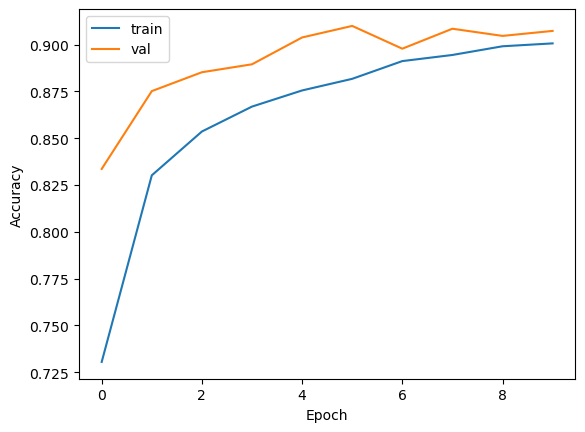

In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

In [25]:
_, acc = model4.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 93.71%


In [26]:
y_pred = np.argmax(model4.predict(X_test),axis=1)
y_pred[:9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=int64)

In [34]:
y_val[:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

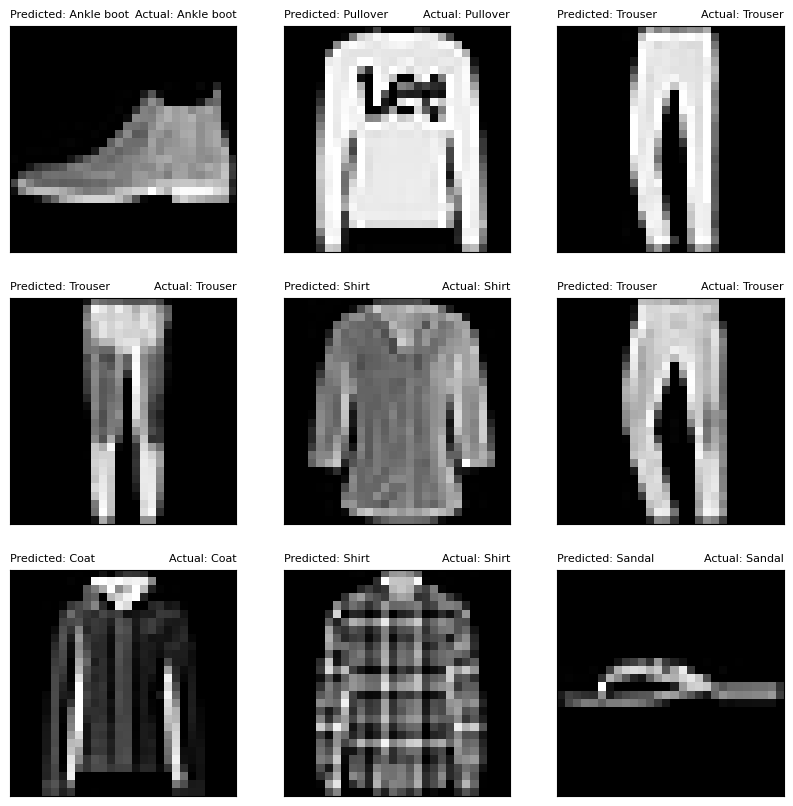

In [36]:
fig = plt.figure(figsize=(10, 10))
col = 3
row = 3
for i in range(col * row):
    label = class_names[y_pred[i]]
    actual = class_names[y_test_pre[i]]
    img = X_test[i, :]
    fig.add_subplot(row, col, i + 1)
    plt.title('Predicted: {}'.format(label), loc='left', fontsize=8)
    plt.title('Actual: {}'.format(actual), loc='right', fontsize=8)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

plt.show()

In [38]:
model5 = tf.keras.Sequential()
  
model5.add(Conv2D(128,  (3,3) , input_shape = ( 28,28,1) , activation = 'relu'))
model5.add(BatchNormalization())
model5.add(Conv2D(128,  (3,3), activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(4, 4)))
model5.add(Dropout(0.5))
  
model5.add(Conv2D(256, (3,3), activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))


model5.add(Dropout(0.5))
  
model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
  
model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())

model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

model5.summary()
model5.compile(Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Shash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,107,850 (4.23 MB)

 Trainable params: 1,105,290 (4.22 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 134s 427ms/step - accuracy: 0.3170 - loss: 2.3789 - val_accuracy: 0.3277 - val_loss: 1.7093
Epoch 2/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 133s 445ms/step - accuracy: 0.6370 - loss: 1.0648 - val_accuracy: 0.7354 - val_loss: 0.6933
Epoch 3/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 128s 426ms/step - accuracy: 0.6916 - loss: 0.8616 - val_accuracy: 0.7952 - val_loss: 0.5413
Epoch 4/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 119s 397ms/step - accuracy: 0.7253 - loss: 0.7637 - val_accuracy: 0.8028 - val_loss: 0.5108
Epoch 5/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 119s 396ms/step - accuracy: 0.7493 - loss: 0.6927 - val_accuracy: 0.8185 - val_loss: 0.4837
Epoch 6/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 118s 393ms/step - accuracy: 0.7634 - loss: 0.6536 - val_accuracy: 0.8201 - val_loss: 0.4735
Epoch 7/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 118s 392ms/step - accuracy: 0.7756 - loss: 0.6152 - val_accuracy: 0.8301 - val_loss: 0.4497
Epoch 8/180
300/300 ━━━━━━━━━━━━━━━━━━━━ 117s 390ms/step - accuracy: 

Text(0, 0.5, 'Accuracy')

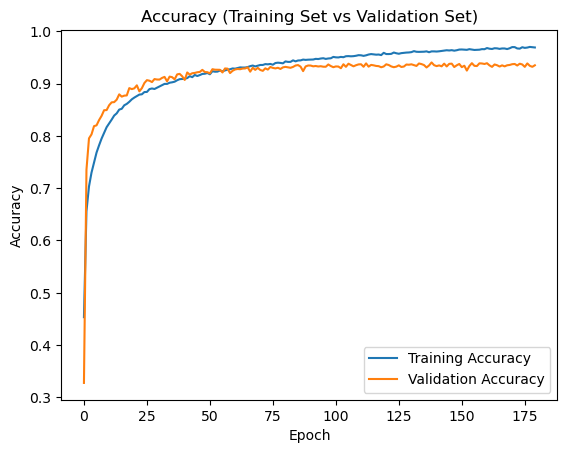

In [39]:
accuracy_threshold = 0.944

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') >= accuracy_threshold):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(accuracy_threshold*100))
			self.model.stop_training = True

callbacks = myCallback()

# Train the model

information  =  model5.fit(X_train,y_train, epochs = 180 , callbacks = [callbacks], validation_split = 0.2 , batch_size = 128 , verbose = 1, shuffle = 1)


# Plot the  accuracy graphs for tuning:


plt.plot(information.history['accuracy'])
plt.plot(information.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy (Training Set vs Validation Set)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [42]:
_, acc = model5.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 93.39%


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


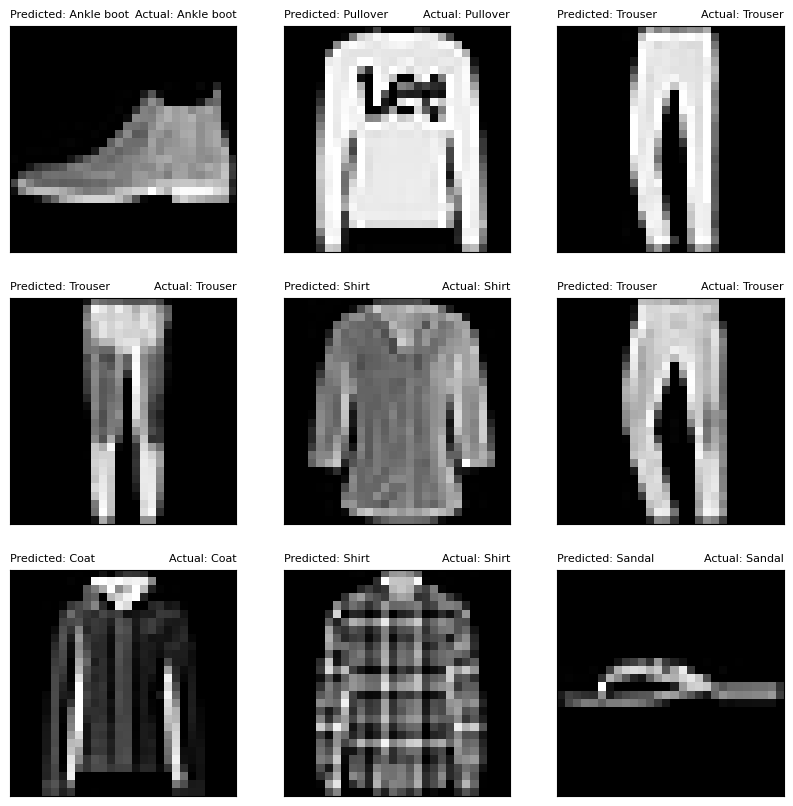

In [41]:
y_pred = np.argmax(model4.predict(X_test),axis=1)
y_pred[:9]

fig = plt.figure(figsize=(10, 10))
col = 3
row = 3
for i in range(col * row):
    label = class_names[y_pred[i]]
    actual = class_names[y_test_pre[i]]
    img = X_test[i, :]
    fig.add_subplot(row, col, i + 1)
    plt.title('Predicted: {}'.format(label), loc='left', fontsize=8)
    plt.title('Actual: {}'.format(actual), loc='right', fontsize=8)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

plt.show()